mAP_Train:
[ScalarEvent(wall_time=1526927107.3064861, step=0, value=0.0), ScalarEvent(wall_time=1526927350.7581825, step=1, value=0.05646951124072075), ScalarEvent(wall_time=1526927584.6341267, step=2, value=0.11802136152982712), ScalarEvent(wall_time=1526927817.6349487, step=3, value=0.11486702412366867), ScalarEvent(wall_time=1526928073.1322362, step=4, value=0.14908553659915924), ScalarEvent(wall_time=1526928316.708735, step=5, value=0.2200135439634323), ScalarEvent(wall_time=1526928551.2354376, step=6, value=0.28946471214294434), ScalarEvent(wall_time=1526928787.1370552, step=7, value=0.3582914471626282), ScalarEvent(wall_time=1526929021.030033, step=8, value=0.43319541215896606), ScalarEvent(wall_time=1526929257.1372316, step=9, value=0.40174591541290283), ScalarEvent(wall_time=1526929492.62382, step=10, value=0.49190154671669006), ScalarEvent(wall_time=1526929728.367306, step=11, value=0.5156046748161316), ScalarEvent(wall_time=1526929962.9841347, step=12, value=0.573539078235626

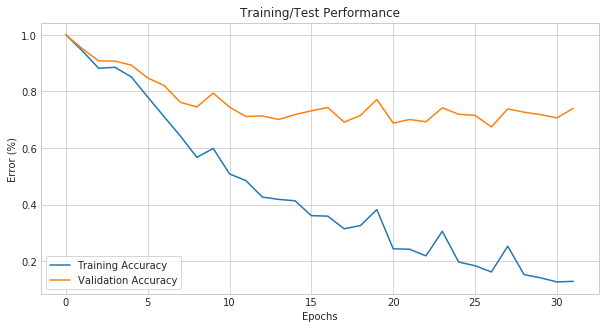

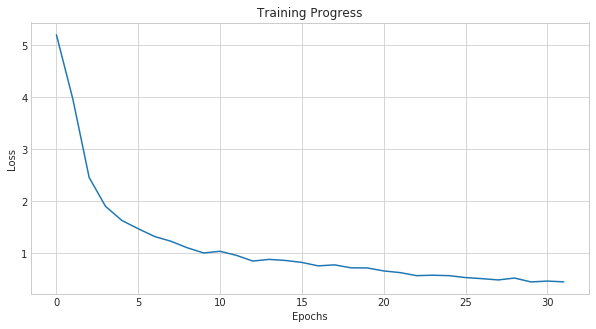

In [50]:
import os
#Modified from https://gist.github.com/tomrunia/1e1d383fb21841e8f144
import numpy as np
#from tensorflow.python.summary.event_accumulator import EventAccumulator
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

BASE_DIR = os.getcwd()
LOG_FILE = os.path.join(BASE_DIR, 'logs', 'events.out.tfevents.1526926860.deep-traffic-v2')

# Loading too much data is slow...
tf_size_guidance = {
    'compressedHistograms': 10,
    'images': 0,
    'scalars': 100,
    'histograms': 1
}

event_acc = EventAccumulator(LOG_FILE, tf_size_guidance)
event_acc.Reload()

# Show all tags in the log file
#print(event_acc.Tags())

training_accuracies = event_acc.Scalars('mAP_train')
test_accuracies = event_acc.Scalars('mAP_test')
loss = event_acc.Scalars('loss')

print("mAP_Train:")
print(training_accuracies)
print("mAP_Test:")
print(test_accuracies)
print("loss:")
print(loss)

steps = len(training_accuracies)
x = np.arange(steps)
y = np.zeros([steps, 3])

for i in range(steps):
    y[i, 0] = (1-training_accuracies[i][2])
    y[i, 1] = (1-test_accuracies[i][2])
    y[i, 2] = loss[i][2]

#Plot Train/Test
plt.figure(figsize=(10,5))
plt.plot(x, y[:,0], label='Training Accuracy')
plt.plot(x, y[:,1], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Error (%)")
plt.title("Training/Test Performance")
plt.legend(loc='lower left', frameon=True)
plt.show()

#Plot Loss
plt.figure(figsize=(10,5))
plt.plot(x, y[:,2])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Progress")
plt.show()

In [42]:
from paths import *
classes_train = []
classes_test = []

with open(TRAIN_GROUND_TRUTH_COMBINED, 'r') as fp:
    for line in fp:
        classes_train.append(int(line[line.rfind(',')+1:]))
        
with open(TEST_GROUND_TRUTH_COMBINED, 'r') as fp:
    for line in fp:
        classes_train.append(int(line[line.rfind(',')+1:]))

total = classes_train + classes_test
count_train = {i:classes_train.count(i) for i in classes_train}   
count_test = {i:classes_test.count(i) for i in classes_test}    
count_total = {i:total.count(i) for i in total}  

#Training
for idx in count_total:
    print("Class {} : {}".format(idx,count_train[idx]))

#for i in range(43):
#    if not i in(classes_train):
#        print("Class {} not represented!!!".format(i))


Class 0 : 557
Class 1 : 163
Class 2 : 219
Class 3 : 31
Class 4 : 83
Class 5 : 159


['/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00143.ppm,241,187,310,256,12\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00035.ppm,264,475,302,514,38\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00363.ppm,407,483,450,526,8\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00314.ppm,1213,398,1247,434,5\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00289.ppm,1282,379,1326,424,6\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00181.ppm,793,299,853,359,4\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00129.ppm,866,399,905,439,26\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00822.ppm,785,407,818,436,11\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00110.ppm,929,489,954,513,9\n',
 '/home/madspoderpetersen/deep-traffic/datasets/GTSDB/FullIJCNN2013/00610.ppm,912,525,939,55